#  Introduction

This notebook contains a function that helps you visualize your long term investment plan.

Step 1: Calculate how much savings do you have for now and estimate how much you can save per year

Step 2: Think about how much money do you need after retirement

- 3,000 Euro/Month --> 36,000 Euro/Year

- Assuming we can have 5% interest rate per year, then we need to accumulate at least 720,000 Euro before retirement (36,000/0.05 = 720,000)

- Please also note that, assuming the inflation rate of 3% per year, the buying power of 3000 Euro in 2050 might only worth 1235 Euro in 2020. Please adjust the inflation rate by yourself when estimating how much money do you need after retirement

Step 3: Estmiate (roughly) how much money do you need to invest per year and calculate it's long term return


# Define functions

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import pandas as pd

plt.style.use('bmh')

In [2]:
def calc_return_over_periods(initial_investment: int, investment_per_period: int,
                             return_per_period: float, n_period: int,
                             increase_investment_per_period: float = 0.00,
                             invest_at_period_begin: bool = True) -> pd.DataFrame:
    """
    This function calculates the overall rate of return across n periods given a certain return rate pre period
    :param initial_investment: Amount of initial investment
    :param investment_per_period: Amount of investment per period
    :param return_per_period: Assumed rate of return per period
    :param n_period: Total number of periods
    :param increase_investment_per_period: Increase the amount of investment by x for each period after the first investment period
    :param invest_at_period_begin: whether to invest at the begining of each period or not
    :return: dataframe contains the rate of return for n periods.
    """
    df_result = pd.DataFrame()

    for i in range(n_period):
        if i == 0:
            if invest_at_period_begin:
                period_begin_investment = initial_investment + investment_per_period
            if not invest_at_period_begin:
                period_begin_investment = initial_investment
            df_result.loc[i, 'period_begin_investment'] = period_begin_investment
            df_result.loc[i, 'total_investment'] = period_begin_investment
            value = period_begin_investment * (1 + return_per_period)
            df_result.loc[i, 'value_by_next_period'] = value
        else:
            if invest_at_period_begin:
                period_begin_investment = investment_per_period * ((1 + increase_investment_per_period) ** i)
            if not invest_at_period_begin:
                period_begin_investment = investment_per_period * ((1 + increase_investment_per_period) ** (i - 1))
            value += period_begin_investment
            df_result.loc[i, 'period_begin_investment'] = period_begin_investment
            df_result.loc[i, 'total_investment'] = (df_result.loc[i - 1, 'total_investment'] +
                                                    df_result.loc[i, 'period_begin_investment'])
            value = value * (1 + return_per_period)
            df_result.loc[i, 'value_by_next_period'] = value

    df_result['return_by_next_period'] = df_result['value_by_next_period'] / df_result['total_investment'] - 1

    return df_result.round(2)


def plot_changes(df: pd.DataFrame,
                 y1: str = 'total_investment', y2: str = 'value_by_next_period',
                 title: str = 'Visualize your saving plan and its future value') -> None:
    """
    This function visualizes the total investment and the total value of the investment plan across time
    :param df: A dataframe contains total investment and total value
    :param y1: Column name
    :param y2: Column name
    :param title: Title of the graph
    :return: A plot
    """
    plt.figure(figsize=(15, 5))
    plt.plot(df[y1], label=y1)
    plt.plot(df[y2], label=y2)
    plt.xlabel('period')
    plt.ylabel('value')
    plt.title(title)
    plt.legend()
    plt.show()

# Case 1

Imagine that you are around 30 years old and have some savings (e.g., 20k Euro), and you are determined to invest 10000 Euro each year in order to have enough money for your retirement.

If you invest your savings into a ETF (e.g., SP500), you are likely to get about 5% annual return on average.

If everything works well, you want to retire around 60, so about 30 years to go!

Let's use the function above to check if we can have enough money saved for retirement in this case.

In [3]:
# Each period is a year

# Assuming investing 20000 Euro initially 
initial_investment = 20000

# Assuming investing 10000 Euro in the begining of each year
investment_per_period = 10000

# Assuming the average investment return rate is about 5%
return_per_period = 0.05

# Assuming the plan lasts for 30 years
n_period = 30

df_plan1 = calc_return_over_periods(initial_investment, investment_per_period, 
                                   return_per_period, n_period)
df_plan1

,period_begin_investment,total_investment,value_by_next_period,return_by_next_period
0,30000.0,30000.0,31500.00,0.05
1,10000.0,40000.0,43575.00,0.09
2,10000.0,50000.0,56253.75,0.13
3,10000.0,60000.0,69566.44,0.16
4,10000.0,70000.0,83544.76,0.19
5,10000.0,80000.0,98222.00,0.23
6,10000.0,90000.0,113633.10,0.26
7,10000.0,100000.0,129814.75,0.30
8,10000.0,110000.0,146805.49,0.33
9,10000.0,120000.0,164645.76,0.37


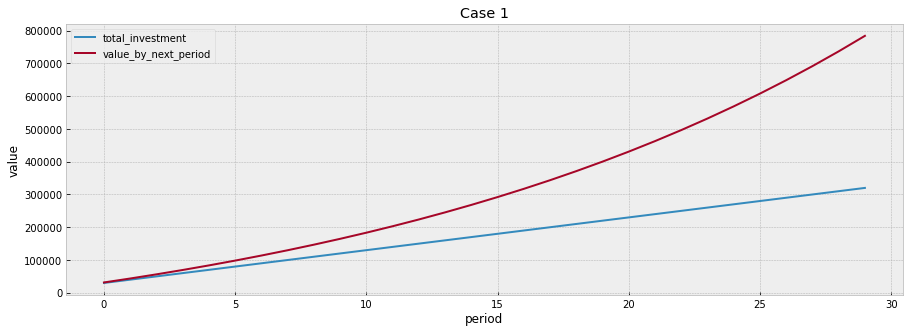

In [4]:
plot_changes(df_plan1, title='Case 1')

Conguraturations! It seems that if you just stick to this plan, you will have enough money for your retirement.

# Case 2
Due to inflation and the increase of your salary, you might decided to save 2% more each year, let's check how that is going to change the final value

In [5]:
# Each period is a year

# Assuming investing 20000 Euro initially 
initial_investment = 20000

# Assuming investing 10000 Euro in the begining of each year
investment_per_period = 10000

# Assuming the average investment return rate is about 5%
return_per_period = 0.05

# Assuming the plan lasts for 30 years
n_period = 30

# Assuming increase the amount of investment each year by 2%
increase_investment_per_period = 0.02

df_plan2 = calc_return_over_periods(initial_investment, investment_per_period, 
                                   return_per_period, n_period,
                                   increase_investment_per_period)

df_plan2

,period_begin_investment,total_investment,value_by_next_period,return_by_next_period
0,30000.00,30000.00,31500.00,0.05
1,10200.00,40200.00,43785.00,0.09
2,10404.00,50604.00,56898.45,0.12
3,10612.08,61216.08,70886.06,0.16
4,10824.32,72040.40,85795.90,0.19
5,11040.81,83081.21,101678.54,0.22
6,11261.62,94342.83,118587.17,0.26
7,11486.86,105829.69,136577.73,0.29
8,11716.59,117546.28,155709.04,0.32
9,11950.93,129497.21,176042.96,0.36


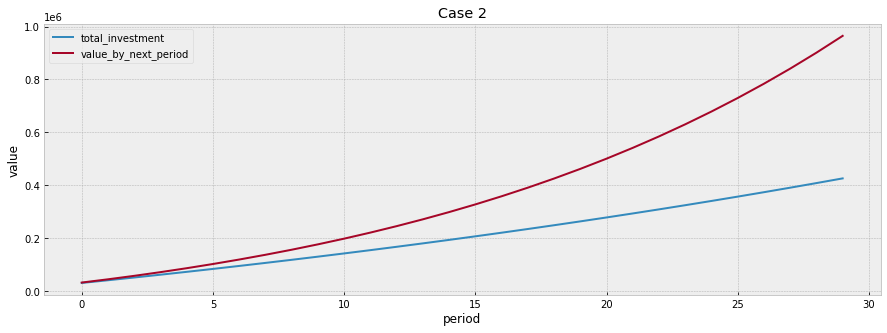

In [6]:
plot_changes(df_plan2, title='Case 2')

It seems that it only takes about 26 years instead of the 30 years in order to have enough savings for retirement. However, the return rate was reduced a bit due to the investment of more money at the later stage of this plan.

# Case 3

Let's imagine that you are at your early 20s and just got your first job recently and do not have any savings for now. 

From next month on, you will be able to save 500 each month.

In [7]:
# Each period is a month

# No initial investment
initial_investment = 0

# Invest 500 Euro at the end of each month
investment_per_period = 500

# Assuming the average investment return rate is about 5% per year
return_per_year = 0.05
return_per_period = (return_per_year + 1)**(1/12) - 1 

# Assuming the plan lasts for 40 years
n_years = 40
n_period = n_years*12

df_plan3 = calc_return_over_periods(initial_investment, investment_per_period, 
                                   return_per_period, n_period,
                                   invest_at_period_begin=False)

df_plan3

,period_begin_investment,total_investment,value_by_next_period,return_by_next_period
0,0.0,0.0,0.00,NaN
1,500.0,500.0,502.04,0.00
2,500.0,1000.0,1006.12,0.01
3,500.0,1500.0,1512.26,0.01
4,500.0,2000.0,2020.45,0.01
...,...,...,...,...
475,500.0,237500.0,726824.57,2.06
476,500.0,238000.0,730287.78,2.07
477,500.0,238500.0,733765.10,2.08
478,500.0,239000.0,737256.59,2.08


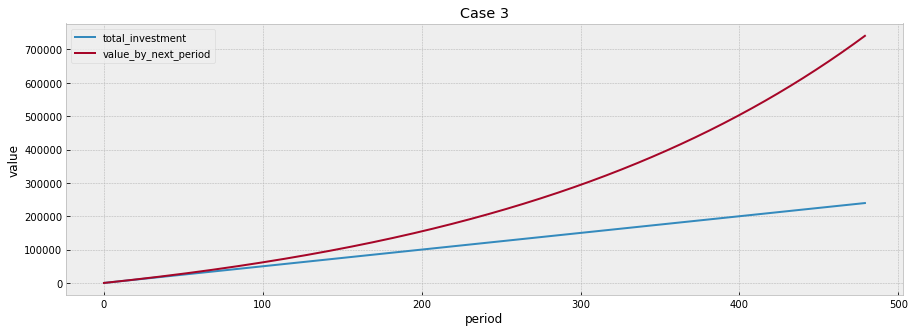

In [8]:
plot_changes(df_plan3, title='Case 3')

Even with little amount of savings, you can still have enough money for your retirement by 60. 

# Conclusion

We can observe that, in plan 3, the rate of return looks way better than case 1 and and case 2. So start investing earlier is always a good idea! 

Hope the current notebook is useful for you to set up a long term investment plan :) 

Starting from the next notebook, we are going to do some backtest using the total return index of SP500.